In [8]:
from kan import *
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [9]:
# Step 1: Read the CSV into a DataFrame
csv_file = 'data/train_transformed_full.csv'
df = pd.read_csv(csv_file)
df = df.sample(frac=0.001, random_state=42)  # Subsample for rapid iteration

features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Convert to tensors  
features_train_tensor = torch.tensor(features_train, dtype=torch.float32)
labels_train_tensor = torch.tensor(labels_train, dtype=torch.float32)
features_test_tensor = torch.tensor(features_test, dtype=torch.float32)
labels_test_tensor = torch.tensor(labels_test, dtype=torch.float32)

# Build dataset the way pykan likes
dataset = {}
dataset['train_input'] = features_train_tensor
dataset['test_input'] = features_test_tensor
dataset['train_label'] = labels_train_tensor
dataset['test_label'] = labels_test_tensor

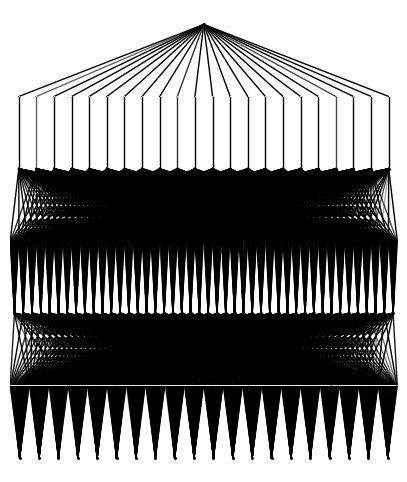

In [10]:
input_shape = dataset['train_input'].shape[1]
# Replicate the architecture of best performing MLP
model = KAN(width=[input_shape, 44, 22, 1], seed=23)

model(dataset['train_input'])
model.plot(beta=100)

In [11]:
num_steps = 10
model.train(dataset, opt="LBFGS", steps=num_steps, lamb=0.01, save_fig_freq=20, loss_fn=nn.MSELoss())

description:   0%|                                                           | 0/10 [00:00<?, ?it/s]

/opt/miniconda3/envs/pykan-env/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([715])) that is different to the input size (torch.Size([715, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/miniconda3/envs/pykan-env/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([179])) that is different to the input size (torch.Size([179, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
train loss: 6.35e-02 | test loss: 6.62e-02 | reg: 4.13e+01 : 100%|██| 10/10 [06:01<00:00, 36.15s/it]


{'train_loss': [array(0.08442075, dtype=float32),
  array(0.08068424, dtype=float32),
  array(0.05695471, dtype=float32),
  array(0.05456455, dtype=float32),
  array(0.05512154, dtype=float32),
  array(0.05459159, dtype=float32),
  array(0.0575918, dtype=float32),
  array(0.05921406, dtype=float32),
  array(0.06204508, dtype=float32),
  array(0.06348208, dtype=float32)],
 'test_loss': [array(0.093706, dtype=float32),
  array(0.08871545, dtype=float32),
  array(0.05918153, dtype=float32),
  array(0.05514549, dtype=float32),
  array(0.05526505, dtype=float32),
  array(0.05561619, dtype=float32),
  array(0.06270345, dtype=float32),
  array(0.06466001, dtype=float32),
  array(0.06623325, dtype=float32),
  array(0.06624619, dtype=float32)],
 'reg': [array(59.31758, dtype=float32),
  array(49.927906, dtype=float32),
  array(43.063522, dtype=float32),
  array(39.05429, dtype=float32),
  array(36.608734, dtype=float32),
  array(46.38346, dtype=float32),
  array(44.265724, dtype=float32),
  arr

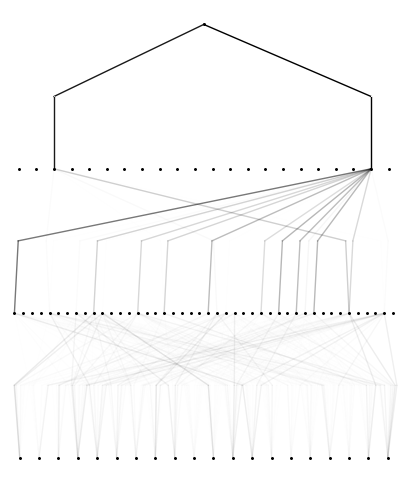

In [12]:
model.prune()
model.plot(mask=True)

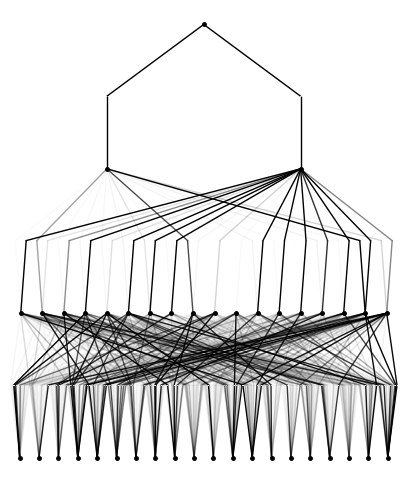

In [13]:
model = model.prune()
model(dataset['train_input'])
model.plot(beta=100)

In [14]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^4, r2=0.5643963813781738
fixing (0,0,1) with sin, r2=0.5781832337379456
fixing (0,0,2) with sin, r2=0.588019609451294
fixing (0,0,3) with sin, r2=0.998552680015564
fixing (0,0,4) with tanh, r2=0.9955323338508606
fixing (0,0,5) with sin, r2=0.9859318137168884
fixing (0,0,6) with tanh, r2=0.7911196947097778
fixing (0,0,7) with x^3, r2=0.6288871169090271
fixing (0,0,8) with x^4, r2=0.7781989574432373
fixing (0,0,9) with x^2, r2=0.9459748864173889
fixing (0,0,10) with tanh, r2=0.7065789103507996
fixing (0,0,11) with tanh, r2=0.9007572531700134
fixing (0,0,12) with x^4, r2=0.5945777297019958
fixing (0,0,13) with abs, r2=0.7335460186004639
fixing (0,0,14) with x^4, r2=0.6199190616607666
fixing (0,0,15) with sin, r2=0.6534392833709717
fixing (0,0,16) with x^4, r2=0.748437225818634
fixing (0,0,17) with tanh, r2=0.7439776062965393
fixing (0,1,0) with sin, r2=0.6394612193107605
fixing (0,1,1) with sin, r2=0.8134678602218628
fixing (0,1,2) with x^2, r2=0.7464960813522339
fix

In [17]:
formula = model.symbolic_formula()

In [18]:
eqn = formula[0]
eqn

[-2.12*(-0.07*(-0.e-2*sin(1.38*x_10 - 8.79) - 0.19*sin(0.35*x_19 - 1.22) + 0.45*sin(0.24*x_20 + 1.81) - 0.05*sin(0.37*x_3 - 7.6) + 0.07*sin(0.38*x_4 + 1.8) - 0.03*sin(0.32*x_6 + 1.6) + 0.05*sin(0.34*x_7 - 7.44) + 0.01*tanh(1.68*x_14 - 4.19) - 0.02*tanh(0.78*x_16 - 2.37) - 1)**4 - 0.02*sqrt(sin(0.26*x_1 + 5.06) + 0.85*sin(0.2*x_12 + 7.98) + 0.01*sin(2.23*x_18 - 0.61) + 0.39*sin(0.33*x_4 + 8.15) + 0.3*sin(0.38*x_6 + 8.2) + 0.49*sin(0.24*x_7 - 4.57) + 0.02*tanh(2.12*x_11 - 4.73) - 0.01*tanh(2.0*x_15 - 4.84) - 0.01*tanh(2.72*x_16 - 6.8) + 0.13*tanh(0.72*x_17 - 1.78) + 0.01*tanh(5.0*x_3 + 10.0) - 0.04*tanh(1.81*x_5 - 4.63)) + 0.04*sqrt(0.01*(-x_20 - 0.89)**2 + 0.1*sin(0.32*x_1 - 7.65) + 0.01*sin(0.66*x_13 - 8.02) - 0.16*sin(0.23*x_14 + 8.01) - 0.17*sin(0.3*x_15 + 8.13) + 0.11*sin(0.3*x_16 - 1.31) - 0.13*sin(0.36*x_4 + 8.17) + 0.01*tanh(1.87*x_12 - 4.6) + 0.05*tanh(0.76*x_5 - 1.69) + 0.01*tanh(2.49*x_6 - 7.6) - 0.e-2*tanh(1.79*x_7 - 4.54) + 0.02*tanh(1.34*x_8 - 3.6) + 1) + 0.01*sqrt(0.03*(-x

In [19]:
formula[1]

[x_1,
 x_2,
 x_3,
 x_4,
 x_5,
 x_6,
 x_7,
 x_8,
 x_9,
 x_10,
 x_11,
 x_12,
 x_13,
 x_14,
 x_15,
 x_16,
 x_17,
 x_18,
 x_19,
 x_20]

In [ ]:
'([-2.12*(-0.07*(-0.e-2*sin(1.38*x_10 - 8.79) - 0.19*sin(0.35*x_19 - 1.22) + 0.45*sin(0.24*x_20 + 1.81) - 0.05*sin(0.37*x_3 - 7.6) + 0.07*sin(0.38*x_4 + 1.8) - 0.03*sin(0.32*x_6 + 1.6) + 0.05*sin(0.34*x_7 - 7.44) + 0.01*tanh(1.68*x_14 - 4.19) - 0.02*tanh(0.78*x_16 - 2.37) - 1)**4 - 0.02*sqrt(sin(0.26*x_1 + 5.06) + 0.85*sin(0.2*x_12 + 7.98) + 0.01*sin(2.23*x_18 - 0.61) + 0.39*sin(0.33*x_4 + 8.15) + 0.3*sin(0.38*x_6 + 8.2) + 0.49*sin(0.24*x_7 - 4.57) + 0.02*tanh(2.12*x_11 - 4.73) - 0.01*tanh(2.0*x_15 - 4.84) - 0.01*tanh(2.72*x_16 - 6.8) + 0.13*tanh(0.72*x_17 - 1.78) + 0.01*tanh(5.0*x_3 + 10.0) - 0.04*tanh(1.81*x_5 - 4.63)) + 0.04*sqrt(0.01*(-x_20 - 0.89)**2 + 0.1*sin(0.32*x_1 - 7.65) + 0.01*sin(0.66*x_13 - 8.02) - 0.16*sin(0.23*x_14 + 8.01) - 0.17*sin(0.3*x_15 + 8.13) + 0.11*sin(0.3*x_16 - 1.31) - 0.13*sin(0.36*x_4 + 8.17) + 0.01*tanh(1.87*x_12 - 4.6) + 0.05*tanh(0.76*x_5 - 1.69) + 0.01*tanh(2.49*x_6 - 7.6) - 0.e-2*tanh(1.79*x_7 - 4.54) + 0.02*tanh(1.34*x_8 - 3.6) + 1) + 0.01*sqrt(0.03*(-x_9 - 0.8)**2 + 0.01*sin(1.38*x_10 - 2.57) - 0.02*sin(1.3*x_11 - 5.55) + 0.17*sin(0.4*x_18 - 1.58) - 0.01*sin(1.34*x_19 + 7.01) - 0.e-2*sin(1.6*x_4 + 7.0) - 0.03*sin(0.47*x_6 + 1.15) + 0.03*tanh(1.78*x_1 - 3.98) - 0.01*tanh(1.84*x_14 - 4.14) - 0.02*tanh(3.94*x_16 + 7.87) + 0.05*tanh(2.1*x_2 - 4.5) + 0.26*tanh(0.91*x_20 - 1.74) + 1) - 0.e-2*(-0.02*(x_16 + 0.23)**2 + 0.16*sin(0.4*x_13 - 1.58) - 0.02*sin(1.34*x_15 - 5.77) - 0.e-2*sin(2.6*x_2 - 7.8) + 0.49*sin(0.29*x_4 + 8.04) + sin(0.2*x_6 - 7.6) + 0.01*sin(2.44*x_8 - 4.79) - 0.02*tanh(2.29*x_1 - 5.1) - 0.02*tanh(2.7*x_10 - 5.12) + 0.05*tanh(2.02*x_11 - 3.81) + 0.39*tanh(0.66*x_12 - 1.47) + 0.02*tanh(3.05*x_14 - 6.09) + 0.01*tanh(4.51*x_17 + 8.99) - 0.17*tanh(1.15*x_19 - 2.36) + 0.04*tanh(1.52*x_3 - 4.03) + 0.02*tanh(2.33*x_7 - 5.8) + 0.84)**3 - 0.01*(0.01*(0.64 - x_4)**2 + 0.01*(x_12 - 0.11)**2 + 0.01*(0.58*x_5 - 1)**2 - 0.08*exp(0.59*x_13) + 0.03*sin(1.55*x_10 - 9.17) - 0.62*sin(0.25*x_16 + 7.79) - 0.e-2*sin(2.07*x_17 - 2.59) + 0.02*sin(1.75*x_18 - 8.76) - 0.03*sin(1.19*x_19 + 0.6) + 0.02*sin(1.44*x_2 + 3.35) + 0.02*sin(1.42*x_20 - 8.4) - 0.02*tanh(5.2*x_11 - 10.0) + 0.04*tanh(2.32*x_14 - 6.2) + 0.05*tanh(1.85*x_15 - 4.88) + 0.01*tanh(1.77*x_3 + 3.76) + 0.02*tanh(1.56*x_6 - 4.21) - 0.02*tanh(4.32*x_7 + 8.6) + 0.06*tanh(1.38*x_8 - 3.61) + 0.01*tanh(2.7*x_9 - 5.0) + 1)**2 + 0.06*sin(-0.02*(-0.77*x_12 - 1)**2 + 0.01*(x_15 + 0.46)**2 - 0.01*(-x_17 - 0.92)**2 + 0.04*(-0.99*x_20 - 1)**2 + 0.01*(-x_7 - 0.35)**2 - 0.e-2*sin(1.42*x_10 + 7.0) - 0.01*sin(1.04*x_11 - 5.21) - 1.06*sin(0.37*x_4 + 1.97) + 0.57*sin(0.35*x_5 - 7.62) + 0.1*sin(0.33*x_6 + 8.53) - 0.02*tanh(2.15*x_1 - 4.88) + 0.31*tanh(0.77*x_13 - 1.42) + 0.04*tanh(1.23*x_18 - 3.52) + 0.29*tanh(0.74*x_2 - 1.54) + 0.02*tanh(2.47*x_3 - 5.0) + 3.55) - 0.e-2*sin(0.01*(0.26 - x_16)**2 + 0.02*(0.69 - x_8)**2 + 0.02*(x_3 - 0.17)**2 + 0.01*sin(2.42*x_1 - 1.21) + 0.51*sin(0.4*x_10 - 1.57) + 0.05*sin(1.29*x_12 - 2.65) - 0.04*sin(1.3*x_13 + 0.73) + 1.19*sin(0.39*x_5 - 7.59) - 1.1*sin(0.37*x_6 + 1.76) + 0.01*sin(2.69*x_9 + 1.64) + 0.17*tanh(1.89*x_14 - 4.6) - 0.03*tanh(2.13*x_15 - 4.75) - 0.1*tanh(1.95*x_17 - 4.82) + 0.07*tanh(2.3*x_18 - 3.72) + 0.13*tanh(1.67*x_19 - 3.49) + 0.05*tanh(3.2*x_2 - 10.0) + 0.64*tanh(1.09*x_20 - 2.05) + 1.85) - 1)**2 - 0.07*sin(-2.88*(0.02*(0.83*x_5 + 1)**2 - 0.e-2*(-x_6 - 0.51)**2 - 0.e-2*sin(1.23*x_11 - 8.41) + 0.27*sin(0.3*x_12 + 7.97) + 0.21*sin(0.46*x_17 + 1.83) - 0.01*sin(1.36*x_19 + 4.03) - 0.e-2*sin(1.41*x_2 + 3.58) + 0.4*sin(0.33*x_20 + 1.77) + 0.05*sin(0.44*x_8 - 1.61) - 1)**3 + 8.21*(0.01*(-x_5 - 0.13)**2 + 0.01*sin(1.38*x_10 - 8.79) + 0.25*sin(0.35*x_19 - 1.22) - 0.59*sin(0.24*x_20 + 1.81) + 0.06*sin(0.37*x_3 - 7.6) - 0.09*sin(0.38*x_4 + 1.8) + 0.04*sin(0.32*x_6 + 1.6) - 0.07*sin(0.34*x_7 - 7.44) - 0.01*tanh(1.68*x_14 - 4.19) + 0.02*tanh(0.78*x_16 - 2.37) + 1)**2 - 0.06*(-0.06*(-x_9 - 0.8)**2 - 0.02*sin(1.38*x_10 - 2.57) + 0.03*sin(1.3*x_11 - 5.55) - 0.34*sin(0.4*x_18 - 1.58) + 0.02*sin(1.34*x_19 + 7.01) + 0.02*sin(1.6*x_4 + 7.0) + 0.06*sin(0.47*x_6 + 1.15) - 0.06*tanh(1.78*x_1 - 3.98) + 0.02*tanh(1.84*x_14 - 4.14) + 0.04*tanh(3.94*x_16 + 7.87) - 0.1*tanh(2.1*x_2 - 4.5) - 0.51*tanh(0.91*x_20 - 1.74) - 0.e-2*tanh(2.09*x_5 - 2.31) - 1)**3 - 1.01*(-0.01*(-x_20 - 0.89)**2 - 0.15*sin(0.32*x_1 - 7.65) + 0.01*sin(1.16*x_11 + 7.0) - 0.01*sin(0.66*x_13 - 8.02) + 0.23*sin(0.23*x_14 + 8.01) + 0.24*sin(0.3*x_15 + 8.13) - 0.16*sin(0.3*x_16 - 1.31) + 0.18*sin(0.36*x_4 + 8.17) - 0.02*tanh(1.87*x_12 - 4.6) - 0.e-2*tanh(1.99*x_18 - 4.06) - 0.07*tanh(0.76*x_5 - 1.69) - 0.e-2*tanh(2.49*x_6 - 7.6) + 0.01*tanh(1.79*x_7 - 4.54) - 0.03*tanh(1.34*x_8 - 3.6) - 1)**2 + 0.16*(-0.01*(-x_9 - 0.52)**2 + 0.02*sin(0.84*x_17 - 5.22) - 0.79*sin(0.24*x_7 + 8.01) + 0.01*tanh(3.29*x_1 - 6.56) + 0.01*tanh(2.53*x_10 - 5.6) + 0.01*tanh(2.08*x_12 - 5.8) + 0.01*tanh(3.33*x_13 - 6.46) + 0.03*tanh(1.73*x_14 - 4.6) - 0.02*tanh(1.73*x_15 - 4.6) + 0.02*tanh(1.57*x_18 - 3.61) - 0.4*tanh(0.53*x_19 - 1.35) + 0.15*tanh(0.77*x_3 - 1.91) + 0.03*tanh(2.13*x_5 - 5.06) + 0.02*tanh(1.66*x_8 - 4.4) + 1)**2 + 0.73*(0.68*sin(0.34*x_11 + 1.93) + 0.01*sin(0.59*x_16 + 7.4) + 0.01*sin(0.99*x_18 + 1.21) + 0.3*sin(0.41*x_4 + 1.98) - 0.31*sin(0.24*x_8 - 1.34) + 0.14*tanh(0.64*x_1 - 1.26) - 0.04*tanh(1.36*x_10 - 2.81) - 0.03*tanh(1.93*x_12 - 4.34) - 0.07*tanh(0.67*x_14 - 1.61) + 0.01*tanh(1.82*x_15 - 4.52) - 0.02*tanh(2.14*x_17 - 5.4) - 0.e-2*tanh(2.55*x_19 - 5.53) + 0.01*tanh(1.64*x_6 - 4.92) + 0.09*tanh(0.68*x_7 - 1.42) - 1)**3 + 0.1*(0.01*(0.13 - x_7)**2 - 0.e-2*(0.64 - x_16)**2 + 0.01*sin(2.55*x_13 - 0.78) + 0.04*sin(1.22*x_18 - 5.42) + 0.94*sin(0.3*x_4 + 8.06) + sin(0.22*x_5 + 4.8) - 0.86*sin(0.3*x_8 + 1.9) + 0.02*tanh(2.51*x_10 + 5.2) - 0.02*tanh(2.51*x_11 - 4.73) + 0.01*tanh(4.43*x_12 - 8.22) - 0.02*tanh(3.31*x_14 - 7.8) - 0.01*tanh(3.52*x_17 - 7.2) - 0.04*tanh(2.11*x_19 - 4.74) + 0.02*tanh(4.93*x_20 + 10.0) - 0.06*tanh(1.82*x_3 - 4.44) + 0.05*tanh(1.32*x_6 - 3.82) + 0.71)**2 - 0.05*(-0.e-2*(0.2 - x_11)**2 - 0.01*(x_2 - 0.08)**2 - 0.03*sin(1.41*x_10 + 3.59) - 0.03*sin(1.44*x_13 - 2.42) - 0.e-2*sin(2.19*x_15 - 8.19) + 0.2*sin(0.51*x_17 - 4.45) + 0.02*sin(1.62*x_18 + 6.78) + 0.02*sin(1.6*x_20 - 5.59) - sin(0.35*x_4 - 1.21) + 0.01*sin(2.16*x_7 - 4.99) + 0.01*tanh(5.4*x_12 + 4.34) - 0.03*tanh(2.87*x_14 - 7.0) - 0.02*tanh(2.32*x_16 + 4.8) + 0.02*tanh(2.46*x_5 - 5.2) + 0.04*tanh(1.61*x_6 - 4.46) + 0.36*tanh(0.57*x_9 - 1.29) - 0.84)**3 + 0.01*(-0.02*(x_16 + 0.23)**2 + 0.16*sin(0.4*x_13 - 1.58) - 0.02*sin(1.34*x_15 - 5.77) - 0.e-2*sin(2.6*x_2 - 7.8) + 0.49*sin(0.29*x_4 + 8.04) + sin(0.2*x_6 - 7.6) + 0.01*sin(2.44*x_8 - 4.79) - 0.02*tanh(2.29*x_1 - 5.1) - 0.02*tanh(2.7*x_10 - 5.12) + 0.05*tanh(2.02*x_11 - 3.81) + 0.39*tanh(0.66*x_12 - 1.47) + 0.02*tanh(3.05*x_14 - 6.09) + 0.01*tanh(4.51*x_17 + 8.99) - 0.17*tanh(1.15*x_19 - 2.36) + 0.04*tanh(1.52*x_3 - 4.03) + 0.02*tanh(2.33*x_7 - 5.8) + 0.93)**3 + 0.07*(-0.e-2*(0.64 - x_4)**2 - 0.e-2*(x_12 - 0.11)**2 - 0.01*(0.58*x_5 - 1)**2 + 0.09*exp(0.59*x_13) - 0.03*sin(1.55*x_10 - 9.17) + 0.72*sin(0.25*x_16 + 7.79) + 0.01*sin(2.07*x_17 - 2.59) - 0.02*sin(1.75*x_18 - 8.76) + 0.03*sin(1.19*x_19 + 0.6) - 0.02*sin(1.44*x_2 + 3.35) - 0.02*sin(1.42*x_20 - 8.4) + 0.02*tanh(5.2*x_11 - 10.0) - 0.04*tanh(2.32*x_14 - 6.2) - 0.06*tanh(1.85*x_15 - 4.88) - 0.01*tanh(1.77*x_3 + 3.76) - 0.03*tanh(1.56*x_6 - 4.21) + 0.02*tanh(4.32*x_7 + 8.6) - 0.07*tanh(1.38*x_8 - 3.61) - 0.01*tanh(2.7*x_9 - 5.0) - 1)**2 - 0.01*exp(0.17*(-x_12 - 0.6)**2 + 0.14*sin(1.52*x_17 - 8.76) - 0.03*sin(2.75*x_18 - 7.21) + 0.19*sin(1.41*x_20 + 0.79) + 0.05*sin(2.34*x_8 - 1.81) - 0.11*sin(1.82*x_9 - 3.21) - 0.25*tanh(1.9*x_10 - 3.97) + 0.05*tanh(5.2*x_11 - 10.0) - 0.08*tanh(4.74*x_13 + 9.6) - 0.13*tanh(5.08*x_15 + 10.0) + 0.5*tanh(1.96*x_16 - 5.53) + 1.01*tanh(1.48*x_19 - 3.04) + 0.46*tanh(1.14*x_4 - 4.0) + 0.06*tanh(2.79*x_7 - 6.36) - 0.e-2*Abs(6.68*x_6 - 9.95)) + 0.5*log(-0.e-2*(0.2 - x_1)**4 + 0.01*(0.34 - x_3)**3 + 0.15*sin(1.42*x_10 + 6.19) - 0.14*sin(1.33*x_13 + 0.86) - 14.28*sin(0.25*x_14 - 1.33) + 0.01*sin(1.81*x_17 - 9.8) - 0.16*sin(1.58*x_18 + 0.99) + 0.03*sin(2.02*x_6 - 2.39) - 29.17*sin(0.18*x_8 - 1.4) - 0.13*tanh(1.72*x_11 - 3.87) - 0.64*tanh(1.46*x_12 - 3.62) - 0.37*tanh(2.26*x_19 - 4.8) - 0.27*tanh(1.67*x_4 - 5.34) + 0.13*tanh(1.54*x_7 - 4.14) + 3.43*tanh(0.54*x_9 - 1.33) - 0.02*Abs(9.21*x_15 - 7.21) - 0.02*Abs(6.79*x_16 - 6.59) - 28.4) - 0.7*sin(-0.03*(-0.77*x_12 - 1)**2 + 0.01*(x_15 + 0.46)**2 - 0.01*(-x_17 - 0.92)**2 + 0.05*(-0.99*x_20 - 1)**2 + 0.01*(-x_7 - 0.35)**2 - 0.e-2*sin(1.42*x_10 + 7.0) - 0.01*sin(1.04*x_11 - 5.21) - 1.16*sin(0.37*x_4 + 1.97) + 0.63*sin(0.35*x_5 - 7.62) + 0.11*sin(0.33*x_6 + 8.53) - 0.02*tanh(2.15*x_1 - 4.88) + 0.34*tanh(0.77*x_13 - 1.42) + 0.04*tanh(1.23*x_18 - 3.52) + 0.32*tanh(0.74*x_2 - 1.54) + 0.02*tanh(2.47*x_3 - 5.0) - 2.75) + 0.e-2*sin(6.64*sin(0.26*x_1 + 5.06) + 5.62*sin(0.2*x_12 + 7.98) + 0.01*sin(2.78*x_13 - 7.19) + 0.05*sin(2.23*x_18 - 0.61) + 2.56*sin(0.33*x_4 + 8.15) + 2.01*sin(0.38*x_6 + 8.2) + 3.24*sin(0.24*x_7 - 4.57) + 0.02*tanh(6.74*x_10 - 10.0) + 0.11*tanh(2.12*x_11 - 4.73) - 0.1*tanh(2.0*x_15 - 4.84) - 0.08*tanh(2.72*x_16 - 6.8) + 0.86*tanh(0.72*x_17 - 1.78) + 0.01*tanh(6.6*x_19 - 10.0) + 0.07*tanh(5.0*x_3 + 10.0) - 0.28*tanh(1.81*x_5 - 4.63) - 0.01*Abs(6.66*x_2 - 2.94) - 0.e-2*Abs(8.16*x_8 - 5.57) + 3.99) - 5.4) + 2.95],
'

In [29]:
type(dataset['test_input'])
type(formula)

tuple

In [32]:
formula[0][0]

-2.12*(-0.07*(-0.e-2*sin(1.38*x_10 - 8.79) - 0.19*sin(0.35*x_19 - 1.22) + 0.45*sin(0.24*x_20 + 1.81) - 0.05*sin(0.37*x_3 - 7.6) + 0.07*sin(0.38*x_4 + 1.8) - 0.03*sin(0.32*x_6 + 1.6) + 0.05*sin(0.34*x_7 - 7.44) + 0.01*tanh(1.68*x_14 - 4.19) - 0.02*tanh(0.78*x_16 - 2.37) - 1)**4 - 0.02*sqrt(sin(0.26*x_1 + 5.06) + 0.85*sin(0.2*x_12 + 7.98) + 0.01*sin(2.23*x_18 - 0.61) + 0.39*sin(0.33*x_4 + 8.15) + 0.3*sin(0.38*x_6 + 8.2) + 0.49*sin(0.24*x_7 - 4.57) + 0.02*tanh(2.12*x_11 - 4.73) - 0.01*tanh(2.0*x_15 - 4.84) - 0.01*tanh(2.72*x_16 - 6.8) + 0.13*tanh(0.72*x_17 - 1.78) + 0.01*tanh(5.0*x_3 + 10.0) - 0.04*tanh(1.81*x_5 - 4.63)) + 0.04*sqrt(0.01*(-x_20 - 0.89)**2 + 0.1*sin(0.32*x_1 - 7.65) + 0.01*sin(0.66*x_13 - 8.02) - 0.16*sin(0.23*x_14 + 8.01) - 0.17*sin(0.3*x_15 + 8.13) + 0.11*sin(0.3*x_16 - 1.31) - 0.13*sin(0.36*x_4 + 8.17) + 0.01*tanh(1.87*x_12 - 4.6) + 0.05*tanh(0.76*x_5 - 1.69) + 0.01*tanh(2.49*x_6 - 7.6) - 0.e-2*tanh(1.79*x_7 - 4.54) + 0.02*tanh(1.34*x_8 - 3.6) + 1) + 0.01*sqrt(0.03*(-x_

In [38]:
def kan_inference(formula, features:torch.Tensor):
    preds = []
    eqn, symbols = formula[0][0], formula[1]
    # Build tuples of (symbol, value) to pass into .subs()
    for sample in features:
        substitutions = []
        for i in range(len(symbols)):
            symbol = symbols[i]
            value = sample[i]
            substitutions.append((symbol, value))
        pred = eqn.subs(substitutions)
        preds.append(pred)
    return preds

In [46]:
test_input = dataset['test_input']

test_preds = kan_inference(formula, test_input)

In [49]:
np.array(test_preds) / 2

array([0.544612637051855, 0.534524865021289, 0.539924731489281,
       0.533044768083787, 0.534911287091064, 0.538724891912372,
       0.539887412354460, 0.534243677806683, 0.542360950555441,
       0.537163561591021, 0.539612394277532, 0.534588461637634,
       0.533751911658811, 0.539681009924053, 0.537818081287900,
       0.544568013224990, 0.542768892875597, 0.533795105573678,
       0.535661442309812, 0.535464761774164, 0.539812384821174,
       0.535741428022833, 0.537396059191209, 0.528166228142643,
       0.538458295188271, 0.536530792026648, 0.535871784518779,
       0.531480940434648, 0.539229859582530, 0.535545047678097,
       0.539246172171337, 0.538648629879433, 0.539658596744523,
       0.525140416830647, 0.524947787553119, 0.531784930879874,
       0.538298601422672, 0.538092123867662, 0.538519644479943,
       0.540559586660804, 0.538572589131979, 0.536200153615427,
       0.543378737532871, 0.539872039024975, 0.533191706669522,
       0.540296196573111, 0.536771854423

In [45]:
dataset['test_label']

tensor([0.4900, 0.5200, 0.4450, 0.5700, 0.4400, 0.6150, 0.4700, 0.5400, 0.5300,
        0.5000, 0.4500, 0.4500, 0.5650, 0.5500, 0.4550, 0.4800, 0.5100, 0.4500,
        0.4200, 0.4200, 0.4300, 0.5300, 0.4800, 0.5700, 0.4450, 0.4700, 0.5300,
        0.5100, 0.4350, 0.5800, 0.5500, 0.4800, 0.4550, 0.4850, 0.5050, 0.5200,
        0.4700, 0.5250, 0.4650, 0.4500, 0.4800, 0.4900, 0.5100, 0.5400, 0.5700,
        0.5050, 0.4350, 0.5300, 0.4650, 0.5850, 0.4650, 0.5500, 0.4800, 0.5150,
        0.4500, 0.4500, 0.4900, 0.4650, 0.5200, 0.5050, 0.4600, 0.4800, 0.5450,
        0.5100, 0.5800, 0.5150, 0.5400, 0.5050, 0.5550, 0.4750, 0.5150, 0.4850,
        0.5350, 0.5300, 0.5150, 0.5900, 0.5700, 0.5350, 0.4550, 0.4600, 0.4850,
        0.5300, 0.4850, 0.5250, 0.5150, 0.6100, 0.4950, 0.5950, 0.5100, 0.4050,
        0.5800, 0.5350, 0.5000, 0.4950, 0.5350, 0.4450, 0.4850, 0.4050, 0.5550,
        0.5750, 0.5500, 0.4900, 0.6050, 0.4500, 0.5650, 0.3850, 0.4450, 0.5350,
        0.4800, 0.5050, 0.4300, 0.4850, 

In [31]:
l1 = [1,2,3]
l2 = [4,5,6]
for i in range(len(l1)):
    print(i)

0
1
2


In [50]:
r2_score(dataset['test_label'], np.array(test_preds) / 2)

-0.4100030291800991